<a href="https://colab.research.google.com/github/gladcolor/Self_organizing_map/blob/master/CSCE822_HW4_HuanNing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Self-organizing map analysis of thermal conductivity dataset


## Install packages

In [3]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=f3bc9e05c6f0483a2b0f19aa2bdd70b311b048bc08dbb63421e0e37d2879dc5c
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


## Import packages

In [4]:
from minisom import MiniSom

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar


from scipy import stats


## Load data

In [5]:
data_df = pd.read_csv(r"https://raw.githubusercontent.com/gladcolor/Self_organizing_map/master/thermal-dataset.csv")
target = data_df['y-exp'].values

data = data_df[data_df.columns[1:21]]
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

print(f"Row count: {len(data_df)}, column count: {len(data_df.columns)}")
data_df.sample(1)

Row count: 370, column count: 23


,Name,V,M,n,np,B,G,E,v,H,B',G',_,vL,vS,va,_e,_el,_es,_e.1,A,y-theory,y-exp
311,2726756_SbPdLa,321.34,1468.28,12,3,77.2701,31.9807,84.31056,0.318148,5.409224,-0.85149,-0.36113,7.579587,3.977469,2.054098,2.299731,158.678721,1.619429,1.647639,1.638289,0.000004,10.320628,2.48


## Train a SOM

In [6]:
# initialization and training of 15x15 SOM
som = MiniSom(15, 15, data.shape[1], sigma=1.0, learning_rate=2.5, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
# Keep these parameters after several trials.
# 0.29 is the best result from sigma between [0.5, 3], learning_rate between [0.5, 5], iteration < 100000.

som.train(data, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2909840496708613


## Show the trained SOM

Grades count: 10
Grade IDs:  [0 1 2 3 4 5 6 7 8 9]


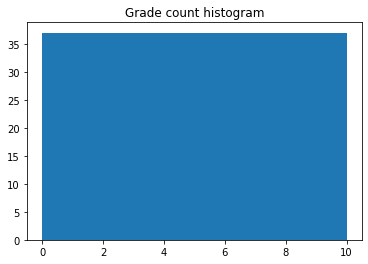

In [7]:
# Generate 10 grades for the target
grades = [int(stats.percentileofscore(target, t) / 10.001) for t in target]

(grades_counts, bins, _) = plt.hist(grades, bins=range(11))

print("Grades count:", len(grades_counts))
print("Grade IDs: ", bins[:-1])
plt.title("Grade count histogram")
plt.show()

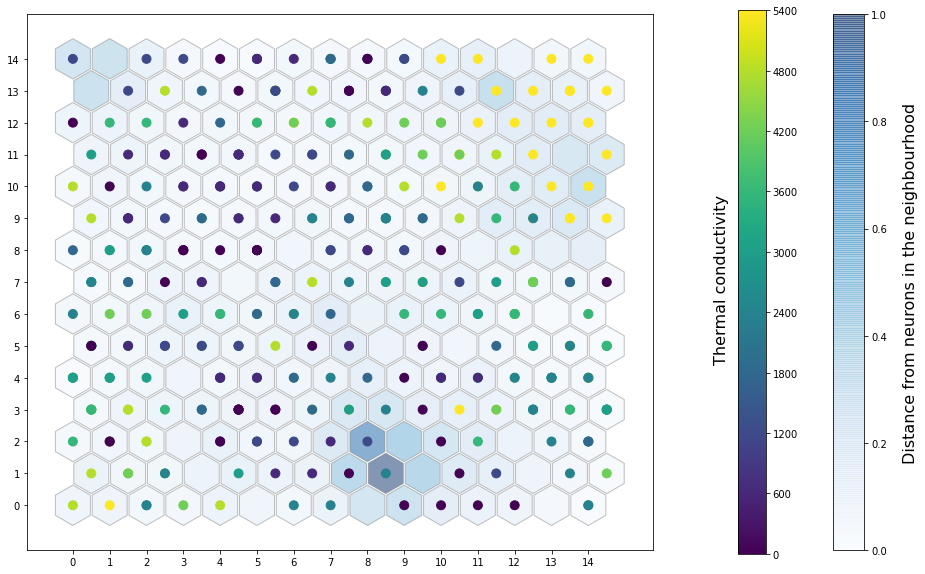

In [11]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()    
weights = som.get_weights()   # dimenssion: [map_weight, map_height, feature_cnt]

fig, axs = plt.subplots(ncols=1, figsize= (15, 10))

axs.set_aspect('equal')

markers = ['.'] * 10
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.5, 
                             edgecolor='gray')
        axs.add_patch(hex)

# Set the plot ticks
xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)


#Your code here:-----------------------------------------

scatter_xyg = []  # to store x, y, grade
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * np.sqrt(3) / 2
    grade = grades[cnt]
    color = cm.plasma(grade/10 + 0.001)
    scatter_xyg.append((wx, wy, grade))


scatter_xyg_np = np.array(scatter_xyg)    

# Draw a scatter plot
dummie_cax = axs.scatter(scatter_xyg_np[:, 0], scatter_xyg_np[:,1], s=80, c=scatter_xyg_np[:, 2], 
            alpha=1, 
            zorder=10,
            cmap=cm.viridis)



# the first colorbar
divider = make_axes_locatable(axs)
ax_cb1 = divider.new_horizontal(size="5%", pad=2.5)    
cb1 = colorbar.ColorbarBase(ax_cb1, cmap=cm.Blues,
                            orientation='vertical', alpha=.5)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('Distance from neurons in the neighbourhood',
                  rotation=90, fontsize=16)
plt.gcf().add_axes(ax_cb1)


# the second colorbar
colorbar_tick_labels = np.linspace(start=0, stop=5400, num=10).astype(int)
cb2 = fig.colorbar(dummie_cax,  ticks=range(10), shrink=1)
cb2.ax.set_yticklabels(colorbar_tick_labels)
ax_cb2 = cb2.ax
ax_cb2.text(-8, 3.2, s="Thermal conductivity", fontsize=16,   rotation=90)



plt.savefig('som_seed_hex.png')
plt.show()

# Question 2: Genetic programming for symbolic regression

## Install packages

In [12]:
! pip install fastsr

     |████████████████████████████████| 160 kB 15.1 MB/s 
  Created wheel for fastsr: filename=fastsr-0.1.0-py3-none-any.whl size=11873 sha256=7a07ce7ef1e4c5e363d9b6dd5f7e529cea573237f7ff13e4ccf84449f67f41c0
  Stored in directory: /root/.cache/pip/wheels/4d/2f/bf/8dad25d97d30bd002936b2372fd31c27f7718ab4ae7701b653
  Created wheel for fastgp: filename=fastgp-0.1.0-py3-none-any.whl size=16329 sha256=50e98e4275a4fcae7c3c45920ea87008a819e524a30a4c21500dbf92bc5c998a
  Stored in directory: /root/.cache/pip/wheels/68/af/67/3bac1fafcfe6d11898b6ffa929af19deec46274192ed778940
Successfully built fastsr fastgp


In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

from scipy import stats

import matplotlib.pyplot as plt

import numpy as np

from fastsr.estimators.symbolic_regression import SymbolicRegression

from fastgp.algorithms.fast_evaluate import fast_numpy_evaluate
from fastgp.parametrized.simple_parametrized_terminals import get_node_semantics

from sklearn.model_selection import train_test_split

## Load data

The first row which has the highest thermal conductivity (5200) is dropped for better training results.

In [107]:
data_df = pd.read_csv(r"https://raw.githubusercontent.com/gladcolor/Self_organizing_map/master/thermal-dataset.csv")
data_df = data_df.sort_values('y-exp', ascending=False)[:]
target = data_df['y-exp'].values


data = data_df[data_df.columns[1:21]]

print(f"Row count: {len(data_df)}, column count: {len(data_df.columns)}")
data_df#.sample(1)

Row count: 370, column count: 23


,Name,V,M,n,np,B,G,E,v,H,B',G',_,vL,vS,va,_e,_el,_es,_e.1,A,y-theory,y-exp
0,66_C,11.41,24.022,2,2,431.74500,518.24900,1110.438653,0.071337,95.902307,-104.58900,-85.59650,3.496005,17.920671,12.175399,13.276809,1755.800206,0.944704,0.775599,0.835777,7.830000e-07,547.103092,5200.000
6,2760096_BeBiLi,227.56,900.012,12,3,46.33900,40.11310,93.391387,0.164101,14.643326,-0.62880,-0.47273,6.560755,3.900665,2.472670,2.719621,210.526270,1.268483,1.174222,1.206461,1.890000e-06,11.652052,748.190
7,7140_SiC,125.96,240.576,12,12,212.56200,187.44400,434.587573,0.159246,36.877491,-4.93794,-1.66011,3.171525,12.075798,7.687793,8.451478,501.955311,0.807190,0.391120,0.564950,3.060000e-07,40.620759,490.000
8,2542_BeO,28.08,50.026,4,4,209.48600,155.78200,374.512053,0.202039,27.111058,-21.54500,-7.02538,2.958334,11.875342,7.256631,8.012949,784.880045,0.873630,0.466502,0.632054,4.010000e-07,61.439358,370.000
9,8062_SiC,21.00,40.096,2,2,212.05700,193.39500,444.927675,0.150308,39.065361,-29.61780,-11.94650,3.170519,12.174340,7.810116,8.578364,925.709377,0.851041,0.481945,0.629500,3.970000e-07,146.431122,360.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,23425_Cs8Pb4Cl24,318.98,685.718,9,9,7.90408,3.76125,9.738952,0.294643,1.820757,-0.11943,-0.05490,3.569691,1.902394,1.026481,1.145781,49.925662,2.211410,2.161283,2.178120,7.800000e-06,0.355215,0.157
366,21613_K5Pb24,995.00,5168.290,29,29,29.59830,8.44429,23.132953,0.369739,1.606076,-0.11003,-0.02278,8.625263,2.176451,0.989454,1.115441,33.264575,1.542956,1.175430,1.309451,2.300000e-06,0.292957,0.135
367,20118_Ag2Cr4Te8,356.66,1444.520,14,14,61.70500,6.38702,18.521996,0.449972,0.416537,-0.76691,0.12912,6.725394,3.231281,0.974519,1.110492,46.620163,1.343732,-3.771786,3.175865,1.930000e-05,0.472719,0.107
368,621624_Sb6Tl21,833.92,5022.480,27,27,29.31150,16.67450,42.049838,0.260903,5.361647,-0.16194,-0.10039,10.000976,2.270223,1.291235,1.435363,45.400795,2.226116,2.343670,2.305152,8.940000e-06,0.919026,0.089


## Train a model

We use all rows to train a symbolic regression model without test set.

In [108]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train= data_df.iloc[1:, 1:21]
y_train= data_df.iloc[1:, -1]

X_train, y_train =np.array(X_train), np.array(y_train)

In [ ]:
# sr = SymbolicRegression(ngen=100, pop_size=100)   # Score: 13137.47 / with first row

# multiply(square(subtract(cbrt(square(X10)), cbrt(X17))), square(cbrt(numpy_protected_sqrt(subtract(add(add(cube(numpy_protected_sqrt(subtract(X14, X9))), add(subtract(X7, subtract(add(X1, X3), add(X16, X9))), subtract(subtract(multiply(subtract(subtract(X14, X10), X9), subtract(X13, X2)), X10), X9))), add(subtract(X7, subtract(subtract(subtract(X5, X9), X9), add(X16, X9))), multiply(X8, subtract(X13, X2)))), X4)))))

# sr = SymbolicRegression(ngen=1000, pop_size=1000)   # Score: 2941  / without first row

# add(add(subtract(subtract(subtract(subtract(subtract(subtract(subtract(subtract(subtract(X12, X7), X7), X7), X7), X7), X7), X7), X7), X7), add(subtract(subtract(subtract(subtract(subtract(subtract(subtract(X12, numpy_protected_sqrt(X3)), X7), X7), X7), X7), X7), X7), add(subtract(subtract(X12, numpy_protected_sqrt(subtract(subtract(subtract(subtract(subtract(X12, numpy_protected_log_abs(X17)), numpy_protected_log_abs(X17)), numpy_protected_log_abs(X17)), X14), numpy_protected_log_abs(X17)))), numpy_protected_sqrt(X3)), add(subtract(subtract(subtract(subtract(numpy_protected_log_abs(X17), X7), X18), X7), X7), add(X12, add(subtract(numpy_protected_log_abs(subtract(subtract(square(subtract(subtract(subtract(X12, X7), numpy_protected_sqrt(X17)), X7)), square(X14)), X11)), X7), subtract(square(subtract(subtract(subtract(subtract(subtract(subtract(subtract(X12, numpy_protected_log_abs(X17)), numpy_protected_log_abs(X17)), X7), X7), X7), X7), X7)), square(X14)))))))), X12)

sr = SymbolicRegression(ngen=1000, pop_size=1000)   # Need a 30 minutes, without first row:   

sr.fit(X_train, y_train)
score = sr.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ErrorAgeSizeComplexity' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/fastgp/utilities/metrics.py:36: RuntimeWarning: overflow encountered in square
  squared_errors = numpy.square(vector - response)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


## Print the results

In [110]:
print('Score: {}'.format(score))

print('Best Individuals:')
sr.print_best_individuals()

Score: 2941.710339745977
Best Individuals:
2941.710339745977 : add(add(subtract(subtract(subtract(subtract(subtract(subtract(subtract(subtract(subtract(X12, X7), X7), X7), X7), X7), X7), X7), X7), X7), add(subtract(subtract(subtract(subtract(subtract(subtract(subtract(X12, numpy_protected_sqrt(X3)), X7), X7), X7), X7), X7), X7), add(subtract(subtract(X12, numpy_protected_sqrt(subtract(subtract(subtract(subtract(subtract(X12, numpy_protected_log_abs(X17)), numpy_protected_log_abs(X17)), numpy_protected_log_abs(X17)), X14), numpy_protected_log_abs(X17)))), numpy_protected_sqrt(X3)), add(subtract(subtract(subtract(subtract(numpy_protected_log_abs(X17), X7), X18), X7), X7), add(X12, add(subtract(numpy_protected_log_abs(subtract(subtract(square(subtract(subtract(subtract(X12, X7), numpy_protected_sqrt(X17)), X7)), square(X14)), X11)), X7), subtract(square(subtract(subtract(subtract(subtract(subtract(subtract(subtract(X12, numpy_protected_log_abs(X17)), numpy_protected_log_abs(X17)), X7), X7

## Plot the results

R squared: 0.37435130717093534
reg.coef_: [[0.37982341]]


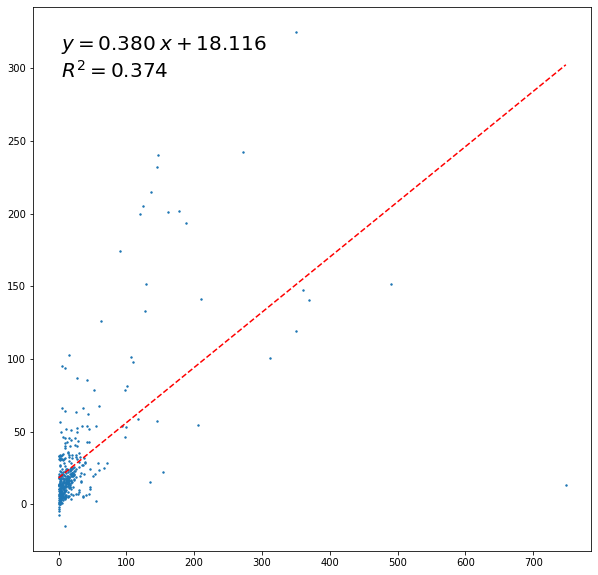

In [111]:
## Get the prediction
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

def draw_r2_squared(ax2, x_true, y_observed):
    x_true = np.array(x_true).reshape((-1, 1))
    y_observed = np.array(y_observed).reshape((-1, 1))
    reg = LR().fit(x_true, y_observed)
    z = np.polyfit(x_true.ravel(), y_observed.ravel(), 1)
    p = np.poly1d(z)
    y_pred = p(x_true)
    R_squared = r2_score(y_observed, y_pred)
    # print()
    print("R squared:", R_squared)
    print("reg.coef_:", reg.coef_)
    # print("x_true:", x_true)
    # print("y_observed:", y_observed)
    # print("z:", z)
    text = f"$y={z[0]:0.3f}\:x{z[1]:+0.3f}$\n$R^2 = {R_squared:0.3f}$"
    ax2.scatter(x=x_true, y=y_observed, s=2)
    ax2.text(0.05, 0.95, text, 
               transform=plt.gca().transAxes,
               fontsize=20,
               verticalalignment='top')
    
    # draw trend line
    line_ends = [min(x_true), max(x_true)]
    end_preds = p(line_ends)
    ax2.plot(line_ends, end_preds, 'r--')


X = data_df.iloc[1:, 1:21] #.reshape((len(X_train), 1))
X = np.array(X)
y =  data_df.iloc[1:, -1] #.reshape((len(y_train), 1))
y = np.array(y)
fig, ax = plt.subplots(figsize=(10, 10))


history = sr.history_
population = list(filter(lambda x: hasattr(x, 'error'), list(sr.history_.genealogy_history.values())))
population.sort(key=lambda x: x.error, reverse=True)
# Reference: https://github.com/cfusting/fast-symbolic-regression

y_hat = fast_numpy_evaluate(population[-1], sr.pset_.context, X, get_node_semantics)

draw_r2_squared(ax, x_true=y, y_observed=y_hat)    

In [103]:
len(list(sr.history_.genealogy_history.values()))

999978